In [1]:
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
bigart_10


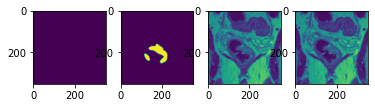

bigart_11


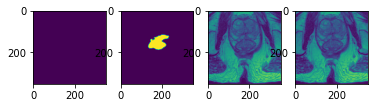

bigart_12


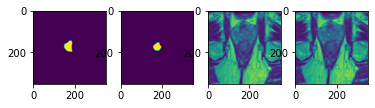

bigart_13


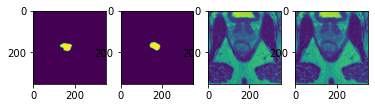

bigart_14


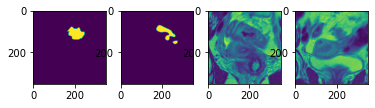

Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
bigart_55


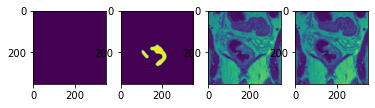

bigart_56


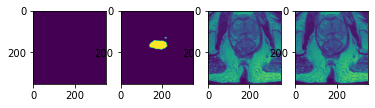

bigart_57


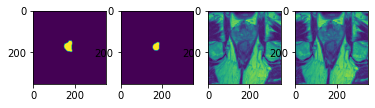

bigart_58


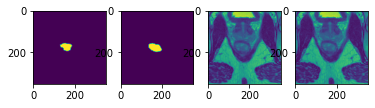

bigart_59


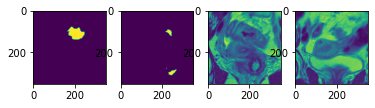

Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now
Not needed now


In [10]:
def calc_dice(X, Y):
    if X.any() or Y.any():
        d = 2* np.count_nonzero(np.logical_and(X, Y)) / (np.count_nonzero(X)+np.count_nonzero(Y))
    else:
        d=0
    return d

def evaluate_experiment(prediction_file, fold, dst):
    prediction = h5py.File(prediction_file, mode='r')
    gt_1 = h5py.File(r'D:/BiGART_inputdata/OxyTarget_T2_ZScore_wTest.h5', mode='r')
    gt_2 = h5py.File(r'D:/BiGART_inputdata/OxyTarget_Delineation2.h5', mode='r')
    

    patient_list = set(gt_2[fold]['352']['patient_ids'])

    slices_in_set_1 = [i for i in gt_1[fold]['352']['patient_ids']]
    slices_in_set_2 = [i for i in gt_2[fold]['352']['patient_ids']]

    res_slice = []
    res_patient = []
    for patient in patient_list:
        m1_pat = []
        m2_pat = []
        idx_to_use_pred = np.where(patient == slices_in_set_1)[0]
        idx_to_use_gt =   np.where(patient == slices_in_set_2)[0]

        
        
#         if len(idx_to_use_pred) >0 :
        for idx_gt, idx_pred in zip(idx_to_use_gt, idx_to_use_pred):
            m1 = gt_2[fold]['352']['target_an'][idx_gt,:,:,:] >0.5
            m2 = prediction['predicted'][idx_pred,:,:,:] >0.5

            fig, ax = plt.subplots(1,4)
            ax[0].imshow(m1)
            ax[1].imshow(m2)
            ax[2].imshow(prediction['x'][idx_pred,:,:,0] )
            ax[3].imshow(gt_2[fold]['352']['input'][idx_gt,:,:,0])
            plt.show()

            
            return
            
            m1 = m1.flatten()
            m2 = m2.flatten()

            res_slice.append([patient, calc_dice(m1, m2)])

            m1_pat.append(m1)
            m2_pat.append(m2)

        m1_pat = np.concatenate(m1_pat)
        m2_pat = np.concatenate(m2_pat)
        res_patient.append([patient, calc_dice(m1_pat, m2_pat)])

        break
        
#         else:
#             print('Missing patient')
        
    
#     pd.DataFrame(res_slice, columns=['patient_ids', 'f1_score']).to_csv(
#                     os.path.join(dst, 'slice_otherDelineation.csv'))
#     pd.DataFrame(res_patient, columns=['patient_ids', 'f1_score']).to_csv(
#                     os.path.join(dst, 'patient_otherDelineation.csv'))

e_list = pd.read_csv('experiments.csv')
for _, row in e_list.iterrows():
    
    if row['ID'] not in ['bigart_10','bigart_11','bigart_12','bigart_13','bigart_14',
                       'bigart_55','bigart_56','bigart_57','bigart_58','bigart_59']:
        print('Not needed now')
        continue
    
    if row['Dataset'] == 'Oxytarget':
        f = 'fold_{}'.format(row['validation_fold'])
        dst = os.path.join(r'D:\BiGART_results', row['ID'])
        
#         if not os.path.isfile(os.path.join(dst, 'patient_otherDelineation.csv')):
        print(row['ID'])
        preds = [i for i in os.listdir(os.path.join(dst, 'prediction')) if i.endswith('.h5')]
        prediction_file = os.path.join(dst, 'prediction', preds[-1])

        evaluate_experiment(prediction_file, f, dst)
#         else:
#             print(row['ID'], '- done')

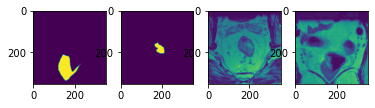

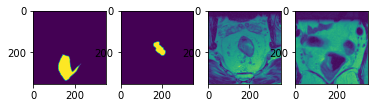

In [9]:
for e_id in [10,55]:
    pred_file = os.path.join(r'D:\BiGART_results', 'test_voted_bigart_{}.h5'.format(e_id))
    dst = os.path.join(r'D:\BiGART_results', '2d__bigart_test_{}'.format(e_id))
    
    if not os.path.isdir(dst):
        os.mkdir(dst)
    
    evaluate_experiment(pred_file, 'fold_6', dst)

1029.0


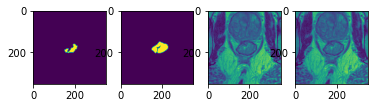

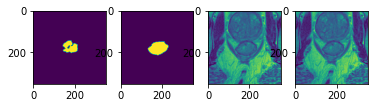

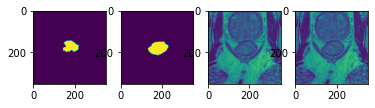

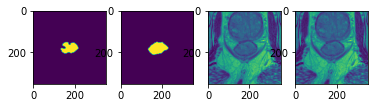

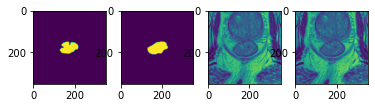

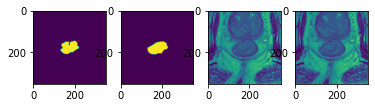

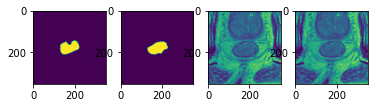

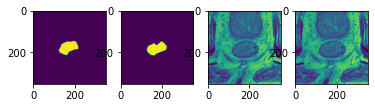

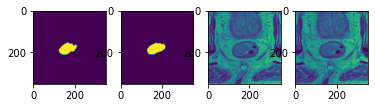

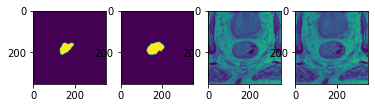

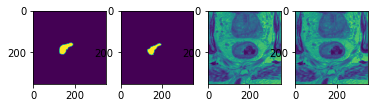

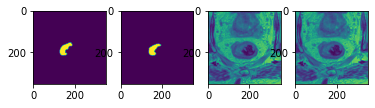

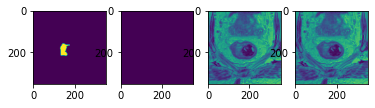

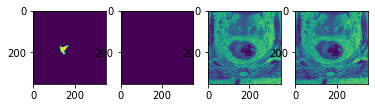

[['1029.0', 0.5636135508155583], ['1029.0', 0.7359936575052854], ['1029.0', 0.7326266195524146], ['1029.0', 0.8431453272951832], ['1029.0', 0.8447315096251267], ['1029.0', 0.8590011044299914], ['1029.0', 0.878555411306503], ['1029.0', 0.8627116579364112], ['1029.0', 0.9440682955549013], ['1029.0', 0.7945024010597781], ['1029.0', 0.8047740835464621], ['1029.0', 0.8069697794718214], ['1029.0', 0.0], ['1029.0', 0.0]]
[['1029.0', 0.7927969836450887]]
1041.0


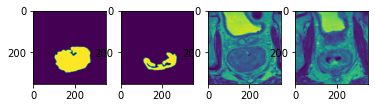

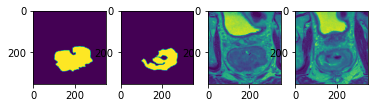

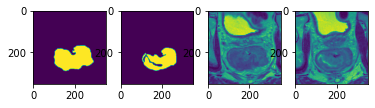

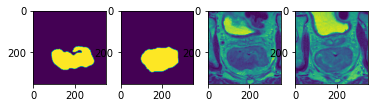

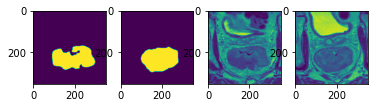

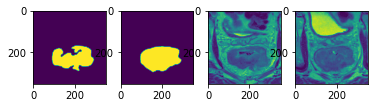

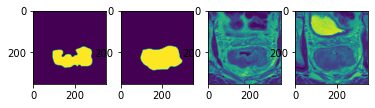

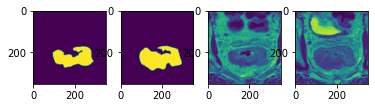

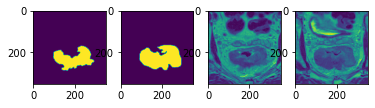

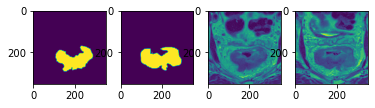

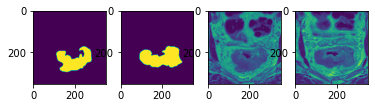

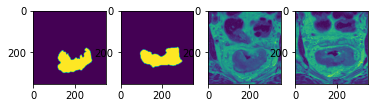

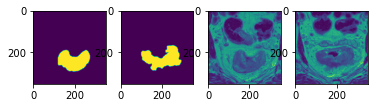

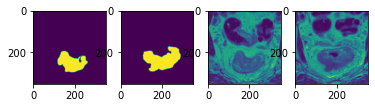

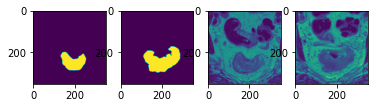

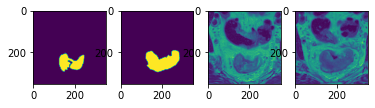

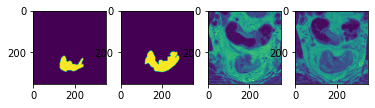

ValueError: Index (17) out of range (0-16)

In [2]:
def calc_dice(X, Y):
    if X.any() or Y.any():
        d = 2* np.count_nonzero(np.logical_and(X, Y)) / (np.count_nonzero(X)+np.count_nonzero(Y))
    else:
        d=0
    return d

def evaluate_experiment_2(prediction_file, fold):
    prediction = h5py.File(prediction_file, mode='r')
    gt_2 = h5py.File(r'D:/BiGART_inputdata/OxyTarget_Delineation2.h5', mode='r')
    

#     patient_list = set(gt_2[fold]['352']['patient_ids'])


    res_slice = []
    res_patient = []
    
    patient_list = [i for i in prediction['predicted'].keys()]
    
    
    for patient in patient_list:
        count = 0
        
        print(patient)
        m1_pat = []
        m2_pat = []
        for s_idx, patient_ids in enumerate(gt_2[fold]['352']['patient_ids']):
            if str(patient_ids) == patient:
                
                m1 = prediction['y'][patient][count,:,:,0] >0.5
                m2 = gt_2[fold]['352']['target_an'][s_idx,:,:,0] > 0.5
                
                fig, ax = plt.subplots(1,4)
                ax[0].imshow(m1)
                ax[1].imshow(m2)
                ax[2].imshow(prediction['x'][patient][count,:,:,0])
                ax[3].imshow(gt_2[fold]['352']['input'][s_idx,:,:,0])
                plt.show()
                count+=1
                

                m1 = m1.flatten()
                m2 = m2.flatten()
                res_slice.append([patient, calc_dice(m1, m2)])

                m1_pat.append(m1)
                m2_pat.append(m2)

    
        m1_pat = np.concatenate(m1_pat)
        m2_pat = np.concatenate(m2_pat)
        res_patient.append([patient, calc_dice(m1_pat, m2_pat)])
        
        
        print(res_slice)
        print(res_patient)
        
    gt_2.close()
    prediction.close()
    
e_id = 10
fold = 'fold_6'
pred_file = os.path.join(r'D:\BiGART_results', 'voted_{}.h5'.format(e_id))
evaluate_experiment_2(pred_file, fold)
